## Exercise 4. Hemoglobin in trout

Hemoglobin is measured (g/100 ml.) in the blood of brown trout after 35 days of treatment with four rates of sulfamerazine: the daily rates of 0, 5, 10 and 15 g of sulfamerazine per 100 pounds of fish, denoted as rates 1, 2, 3 and 4, respectively. (Beware that the levels of the factor rate are coded by numbers.) Two methods (denoted as A and B) of administering the sulfamerazine were used. The data is collected in data set hemoglobin.txt

In [1]:
fish = read.table("hemoglobin.txt",header=TRUE)

### 4a)  Present an R-code for the randomization process to distribute 80 fishes over all combinations of levels of factors rate and method.

In [4]:
hemoglobin=fish$hemoglobin; rate=fish$rate; method=fish$method; 
rbind(rep(method), rep(rate), sample(hemoglobin))

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]  1.0 2.0  1.0   2.0 1    2.0  1    2.0  1.0  2.0   ...   1.0    2.0  1.0  
[2,]  1.0 1.0  1.0   1.0 1    1.0  1    1.0  1.0  1.0   ...   4.0    4.0  4.0  
[3,] 10.2 9.3  8.1  11.3 9    6.8  7    7.8  6.7  6.1   ...   8.6   10.2  9.3  
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,]  2.0  1.0   2.0   1.0   2.0    1.0  2.0  
[2,]  4.0  4.0   4.0   4.0   4.0    4.0  4.0  
[3,] 10.6  7.1   9.3   9.3   7.2   10.7  5.5

### 4b) Perform the two-way ANOVA to test for effects of factors rate, method and their interaction on the response variable hemoglobin. Comment on your findings.

The following objects are masked _by_ .GlobalEnv:

    hemoglobin, method, rate



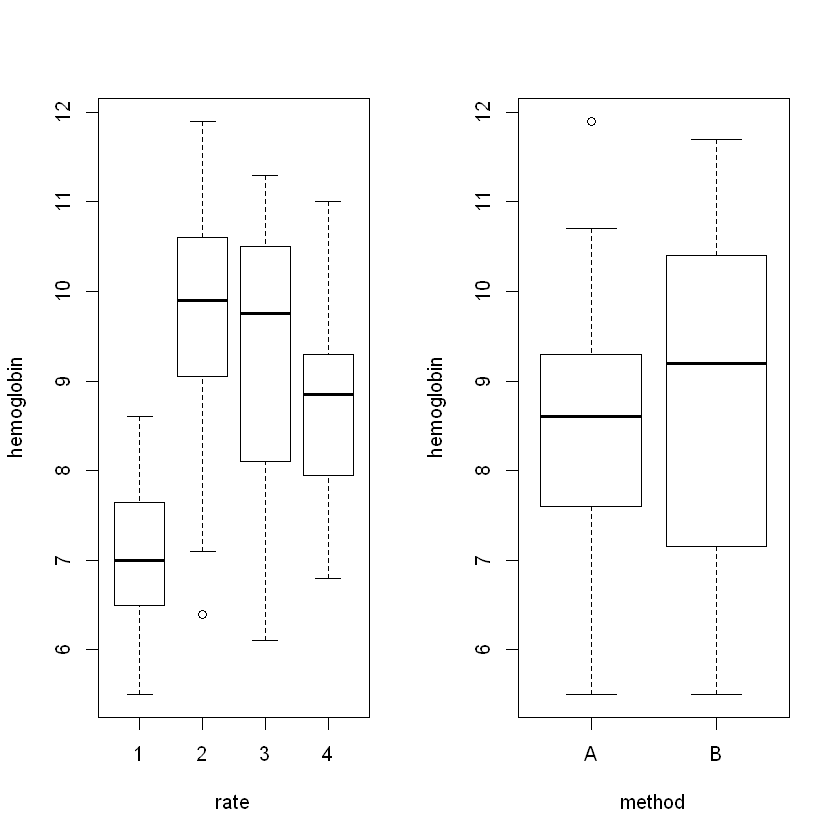

In [5]:
par(mfrow=c(1,2))
attach(fish)
boxplot(hemoglobin~rate); boxplot(hemoglobin~method)

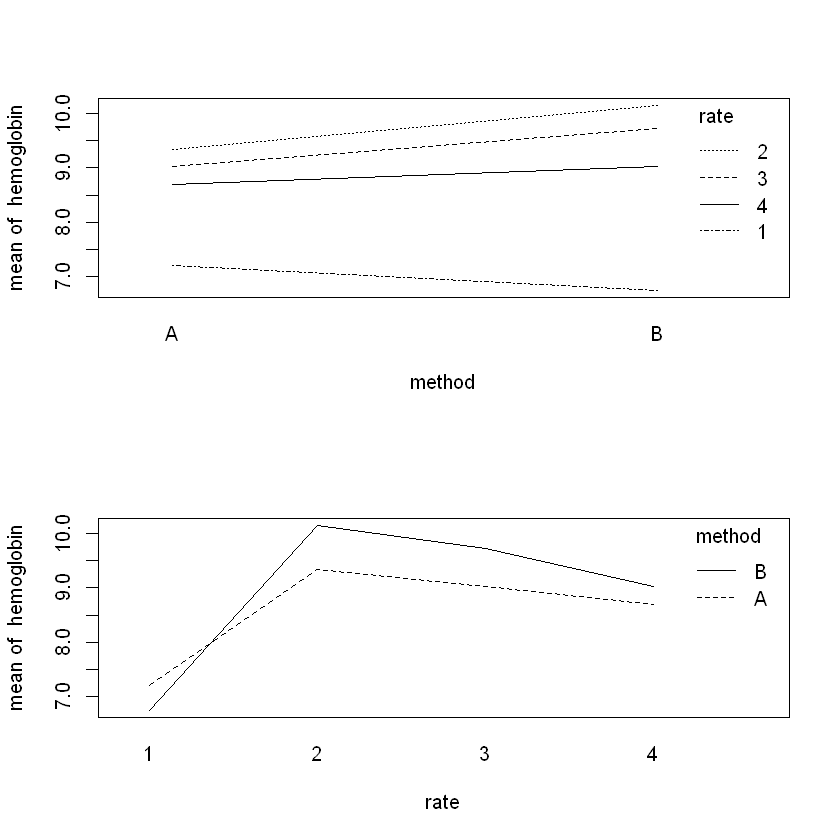

In [6]:
par(mfrow=c(2,1))
interaction.plot(method, rate, hemoglobin); interaction.plot(rate, method, hemoglobin)

Since rate is defined as a numerical variable it has to be converted to a factor variable

In [7]:
fish$rate = factor(fish$rate, 
                    levels = c(1,2,3,4),
                    labels = c('Rate1', 'Rate2', 'Rate3', 'Rate4'))

We assume that factors rate and method are independent for the first test

In [8]:
res.aov_dep = aov(hemoglobin ~ method * rate, data = fish)
summary(res.aov_dep)

            Df Sum Sq Mean Sq F value  Pr(>F)    
method       1   2.42   2.415   1.558   0.216    
rate         3  90.56  30.187  19.469 2.4e-09 ***
method:rate  3   4.87   1.624   1.047   0.377    
Residuals   72 111.64   1.551                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

From this test, we can conclude that the interaction of the method on the hemoglobin is not significant, but that the rate is significant on the amount of hemoglobin in the trout. This is based on the significance level α=0.05. Since the null hypothesis can be rejected based on this test, there is no need to test for the effects under the additive model.

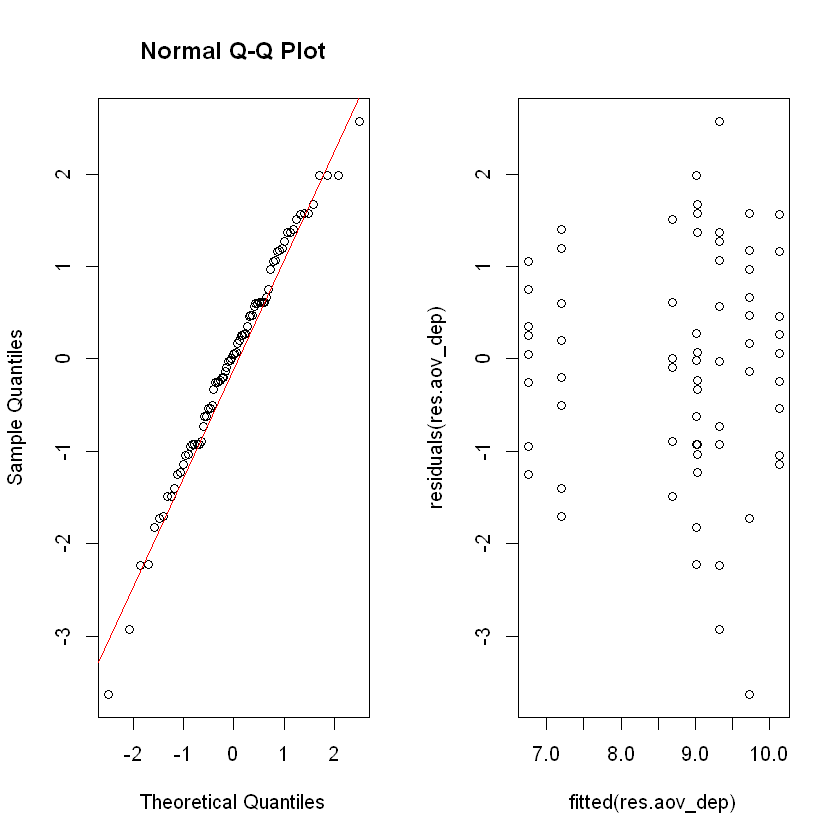

In [9]:
par(mfrow=c(1,2)); qqnorm(residuals(res.aov_dep)); qqline(residuals(res.aov_dep), col = 'red')
plot(fitted(res.aov_dep), residuals(res.aov_dep)); 

The normality of the left plot is clear, while the right plot seems to have a larger concentration and spread when the fitted values get above 9. It doesn't seem to deviate significantly from normal.

### 4c) Which of the two factors has the greatest influence? Is this a good question? Consider the additive model. Which combination of rate and method yield the highest hemoglobin? Estimate the mean hemoglobin value for rate 3 by using method A. What rate leads to the highest mean hemoglobin?

In [27]:
fish_method_rate_aov = aov(hemoglobin ~ method + rate, data = fish)
summary(fish_method_rate_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
method       1   2.42   2.415   1.555    0.216    
rate         3  90.56  30.187  19.432 2.02e-09 ***
Residuals   75 116.51   1.553                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

To first address which of the factors has the greatest influence, since the interaction of rate on the hemoglobin values is the only factor that has a significant interaction with the hemoglobin we can conclude that the rate has the greatest influence.

This is also the case in the additive model seen above, where the method doesn't have a significant influence on the amount of hemoglobin.

By answering the question which factor is more influential it becomes clear what causes the differences in hemoglobin in trout which would be crucuial when deciding what kind of treatment to perform on trouts.

In [28]:
fish[which.max(fish$hemoglobin),]

hemoglobin rate  method
31 11.9       Rate2 A

In [29]:
rate3_method_a = fish[fish$rate == 'Rate3' & fish$method == 'A', ]; mean(rate3_method_a$hemoglobin)

[1] 9.03

In [30]:
mean(fish[fish$rate == 'Rate1', ]$hemoglobin); 
mean(fish[fish$rate == 'Rate2', ]$hemoglobin); 
mean(fish[fish$rate == 'Rate3', ]$hemoglobin); 
mean(fish[fish$rate == 'Rate4', ]$hemoglobin)

[1] 6.975

[1] 9.735

[1] 9.38

[1] 8.855

By using Rate 2 and method A, the highest hemoglobin count can be achieved at 11.9. The mean hemoglobin value for rate 3 using method A is 9.03 and the highest mean hemoglobin can be achieved using Rate 2, at a value of 9.735.

### 4d) Test the null hypothesis that the hemoglobin is the same for all rates by a one-way ANOVA test, ignoring the variable method. Is it right/wrong or useful/not useful to perform this test on this dataset?

In [31]:
fish_rate_aov=lm(hemoglobin~rate, data=fish);
summary(fish_rate_aov)
confint(fish_rate_aov)


Call:
lm(formula = hemoglobin ~ rate, data = fish)

Residuals:
   Min     1Q Median     3Q    Max 
-3.335 -0.740  0.075  0.825  2.165 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.9750     0.2797  24.936  < 2e-16 ***
rateRate2     2.7600     0.3956   6.977 9.69e-10 ***
rateRate3     2.4050     0.3956   6.080 4.48e-08 ***
rateRate4     1.8800     0.3956   4.753 9.31e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.251 on 76 degrees of freedom
Multiple R-squared:  0.4323,	Adjusted R-squared:  0.4099 
F-statistic: 19.29 on 3 and 76 DF,  p-value: 2.129e-09


2.5 %    97.5 %  
(Intercept) 6.417902 7.532098
rateRate2   1.972144 3.547856
rateRate3   1.617144 3.192856
rateRate4   1.092144 2.667856

Check whether the assumption of normality is not totally untrue

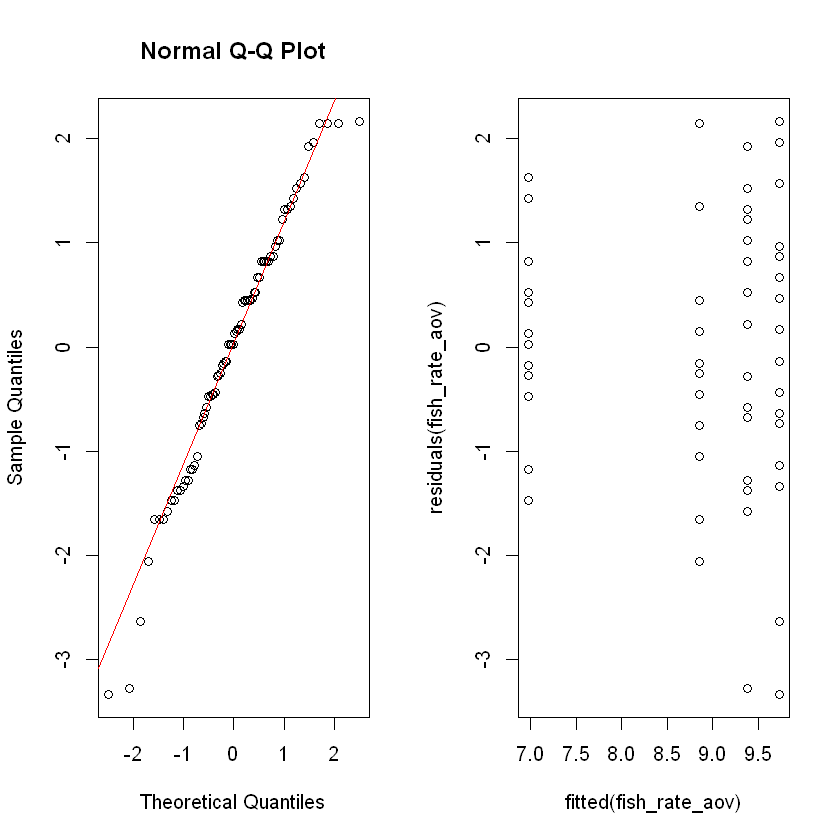

In [32]:
par(mfrow=c(1,2)); qqnorm(residuals(fish_rate_aov)); qqline(residuals(fish_rate_aov), col = 'red')
plot(fitted(fish_rate_aov), residuals(fish_rate_aov)); 

The QQ plot implies normality, while the right plot seems to have a larger concentration and spread when the fitted values get above 9. The residual plot doesn't seem to deviate significantly from normal.

A confidence interval is said to be significantly different if it doesn't contain the value we are testing against, since the null hypothesis states that hemoglobin is the same for all rates, we can take Rate 1 and look at the mean, which is 6.975. This value is not present in the confidence intervals of any of the other rates, meaning that not all rates lead to the same hemoglobin. We thus reject the null hypothesis.

While the influence of method on hemoglobin was deemed insignificant, the little effect it might have had is now added onto the rates, this makes it somewhat of a wrong way to go about testing significance. Especially because a two-way ANOVA test would also work and is more suited. However, it can be useful to have a more isolated view of the influence of the rates.